# ***Predicting Stock Prices with Linear Regression ***

### Stock market forecasting is an attractive application of linear regression. Modern machine learning packages like **scikit**-**learn** make implementing these analyses possible in a few lines of code.

# **Step 1: Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

## **Step 2: Read in and Explore the data**

In [4]:
## Read in the Tarin_data set
stock_train = pd.read_csv('Tadawul_stcks.csv')
stock_train

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51288,2090,National Gypsum Co.,NGC,Materials,2016-05-08,14.80,15.00,14.80,14.84,0.20,1.37,307694.0,4591737.40,225.0
51289,2090,National Gypsum Co.,NGC,Materials,2016-05-05,14.50,15.30,14.50,14.64,0.30,2.09,1133024.0,16888908.65,703.0
51290,2090,National Gypsum Co.,NGC,Materials,2016-05-04,14.85,14.85,14.30,14.34,-0.41,-2.78,204782.0,2972333.40,143.0
51291,2090,National Gypsum Co.,NGC,Materials,2016-05-03,15.20,15.20,14.70,14.75,-0.42,-2.77,252550.0,3767259.25,211.0


In [5]:
## Read in the Test_data set
stock_test = pd.read_csv('Tadawul_stcks_23_4.csv')
stock_test

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.80,31.80,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.50,31.40,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.70,32.30,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.70,32.90,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.50,32.80,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-12,20.20,21.20,20.16,20.70,-1.70,-7.59,1618746.0,33206311.44,2329.0
6988,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-11,24.50,24.50,21.60,22.40,-1.60,-6.67,1487872.0,33903289.20,2092.0
6989,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-10,22.98,24.24,22.68,24.00,1.22,5.36,1877511.0,43740461.26,2359.0
6990,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-09,22.78,23.18,22.78,22.78,-2.52,-9.96,1041240.0,23747279.76,893.0


In [6]:
## Get information of train_Data
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51293 entries, 0 to 51292
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          51293 non-null  int64  
 1   name            51293 non-null  object 
 2   trading_name    51293 non-null  object 
 3   sectoer         51293 non-null  object 
 4   date            51293 non-null  object 
 5   open            51217 non-null  float64
 6   high            51214 non-null  float64
 7   low             51213 non-null  float64
 8   close           51292 non-null  float64
 9   change          51292 non-null  float64
 10  perc_Change     51292 non-null  float64
 11  volume_traded   51292 non-null  float64
 12  value_traded    51292 non-null  float64
 13  no_trades       51292 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 5.5+ MB


In [7]:
## Get information of test_Data
stock_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          6992 non-null   int64  
 1   name            6992 non-null   object 
 2   trading_name    6992 non-null   object 
 3   sectoer         6992 non-null   object 
 4   date            6992 non-null   object 
 5   open            6830 non-null   float64
 6   high            6830 non-null   float64
 7   low             6830 non-null   float64
 8   close           6992 non-null   float64
 9   change          6992 non-null   float64
 10  perc_Change     6992 non-null   float64
 11  volume_traded   6992 non-null   float64
 12  value_traded    6992 non-null   float64
 13  no_trades       6992 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 764.9+ KB


In [8]:
stock_train.shape

(51293, 14)

In [9]:
stock_test.shape

(6992, 14)

In [10]:
## Represent first Five rows in train_data
stock_train.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [11]:
## Represent first Five rows in test_data
stock_test.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0


In [12]:
#Find the duplicates
stock_train.duplicated().sum()

0

In [13]:
# Extract duplicate rows
stock_train.loc[stock_train.duplicated(), :]

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades


In [14]:
# Remove duplicate rows
stock_train.drop_duplicates(inplace=True)

# **Step 3: Descriptive Statistics**

In [15]:
# descriptive statistic parameters for the dataset to see the number of null values, datatypes, and memory usage
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,51293.000000,51217.000000,51214.000000,51213.000000,51292.000000,51292.000000,51292.000000,5.129200e+04,5.129200e+04,51292.000000
mean,2157.256331,38.204623,38.746710,37.704384,38.167003,0.002568,0.026153,2.299308e+06,9.842619e+07,1244.477501
std,927.821560,34.671569,35.279181,34.129145,34.682681,1.687899,2.463776,5.290290e+06,2.606215e+08,5004.987066
min,1201.000000,2.250000,2.250000,2.250000,0.000000,-143.840000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,1320.000000,17.120000,17.300000,16.980000,17.100000,-0.250000,-0.890000,2.530878e+05,6.795741e+06,238.000000
50%,2020.000000,26.000000,26.400000,25.700000,26.000000,0.000000,0.000000,7.635730e+05,2.014302e+07,505.000000
75%,2060.000000,43.000000,43.800000,42.500000,43.000000,0.250000,0.920000,2.419690e+06,6.720489e+07,1228.000000
max,4200.000000,389.250000,421.500000,386.250000,398.250000,92.000000,14.580000,4.179278e+08,1.586582e+10,587262.000000


.

# **Step 4: Prepare the data (Cleaning)**

### **Missing value imputation**


### We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature). We will use the isnull() function for this purpose.

In [16]:
stock_train.isnull().sum()

symbol             0
name               0
trading_name       0
sectoer            0
date               0
open              76
high              79
low               80
close              1
change             1
perc_Change        1
volume_traded      1
value_traded       1
no_trades          1
dtype: int64

In [17]:
stock_train.dropna(inplace = True)
stock_test.dropna(inplace = True)

In [18]:
stock_train.open[stock_train.open>47.0]= stock_train.open.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,51213.000000,51213.000000,51213.000000,51213.000000,51213.000000,51213.000000,51213.000000,5.121300e+04,5.121300e+04,51213.000000
mean,2157.391736,23.419994,38.747168,37.704384,38.211645,0.003859,0.029699,2.302852e+06,9.857796e+07,1246.339308
std,928.386672,8.431386,35.279373,34.129145,34.689552,1.669975,2.384306,5.293599e+06,2.607937e+08,5008.614122
min,1201.000000,2.250000,2.250000,2.250000,2.250000,-143.840000,-90.470000,6.000000e+02,1.515000e+04,1.000000
25%,1320.000000,17.120000,17.300000,16.980000,17.130000,-0.250000,-0.890000,2.544660e+05,6.830357e+06,239.000000
50%,2020.000000,26.000000,26.400000,25.700000,26.000000,0.000000,0.000000,7.665700e+05,2.020018e+07,506.000000
75%,2060.000000,26.800000,43.800000,42.500000,43.090000,0.250000,0.920000,2.423727e+06,6.736697e+07,1229.000000
max,4200.000000,47.000000,421.500000,386.250000,398.250000,92.000000,14.580000,4.179278e+08,1.586582e+10,587262.000000


In [20]:
stock_train['date'] =  pd.to_datetime(stock_train['date'])

In [21]:
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51213 entries, 0 to 51291
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   symbol          51213 non-null  int64         
 1   name            51213 non-null  object        
 2   trading_name    51213 non-null  object        
 3   sectoer         51213 non-null  object        
 4   date            51213 non-null  datetime64[ns]
 5   open            51213 non-null  float64       
 6   high            51213 non-null  float64       
 7   low             51213 non-null  float64       
 8   close           51213 non-null  float64       
 9   change          51213 non-null  float64       
 10  perc_Change     51213 non-null  float64       
 11  volume_traded   51213 non-null  float64       
 12  value_traded    51213 non-null  float64       
 13  no_trades       51213 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)


In [22]:
stock_train['year'] = pd. DatetimeIndex(stock_train['date']). year

In [23]:
stock_train['date'] = pd.to_datetime(stock_train['date'])
stock_train['year_date'] = stock_train['date'].dt.year

stock_test['date'] = pd.to_datetime(stock_test['date'])
stock_test['year_date'] = stock_test['date'].dt.year

stock_train.drop([ 'date'], axis='columns', inplace=True)
stock_test.drop([ 'date'], axis='columns', inplace=True)

In [24]:
stock_test.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year_date
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0,2020
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0,2020
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0,2020
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0,2020
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0,2020


In [25]:
stock_train.high[stock_train.high>50]= stock_train.high.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
stock_train.low[stock_train.low>47.0]= stock_train.low.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
stock_train.close[stock_train.close>55]= stock_train.close.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
stock_train.change[stock_train.change>50]= stock_train.close.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
stock_train.change[stock_train.change<-50]= stock_train.close.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
stock_train.perc_Change[stock_train.perc_Change>99.9]= stock_train.perc_Change.median()
stock_train.perc_Change[stock_train.perc_Change<-99.9]= stock_train.perc_Change.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
stock_train.columns = stock_train.columns.str.replace(' ', '')

In [32]:
stock_train.no_trades[stock_train.no_trades>1500]= stock_train.no_trades.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year,year_date
count,51213.000000,51213.000000,51213.000000,51213.00000,51213.000000,51213.000000,51213.000000,5.121300e+04,5.121300e+04,51213.000000,51213.000000,51213.000000
mean,2157.391736,23.419994,23.969771,23.19377,24.259949,0.005886,0.029699,2.302852e+06,9.857796e+07,481.911487,2012.614180,2012.614180
std,928.386672,8.431386,8.919125,8.40762,9.790411,1.498638,2.384306,5.293599e+06,2.607937e+08,316.797954,4.819736,4.819736
min,1201.000000,2.250000,2.250000,2.25000,2.250000,-36.000000,-90.470000,6.000000e+02,1.515000e+04,1.000000,2001.000000,2001.000000
25%,1320.000000,17.120000,17.300000,16.98000,17.130000,-0.250000,-0.890000,2.544660e+05,6.830357e+06,239.000000,2009.000000,2009.000000
50%,2020.000000,26.000000,26.400000,25.70000,26.000000,0.000000,0.000000,7.665700e+05,2.020018e+07,506.000000,2013.000000,2013.000000
75%,2060.000000,26.800000,27.600000,26.55000,28.200000,0.250000,0.920000,2.423727e+06,6.736697e+07,571.000000,2017.000000,2017.000000
max,4200.000000,47.000000,50.000000,47.00000,55.000000,49.250000,14.580000,4.179278e+08,1.586582e+10,1500.000000,2020.000000,2020.000000


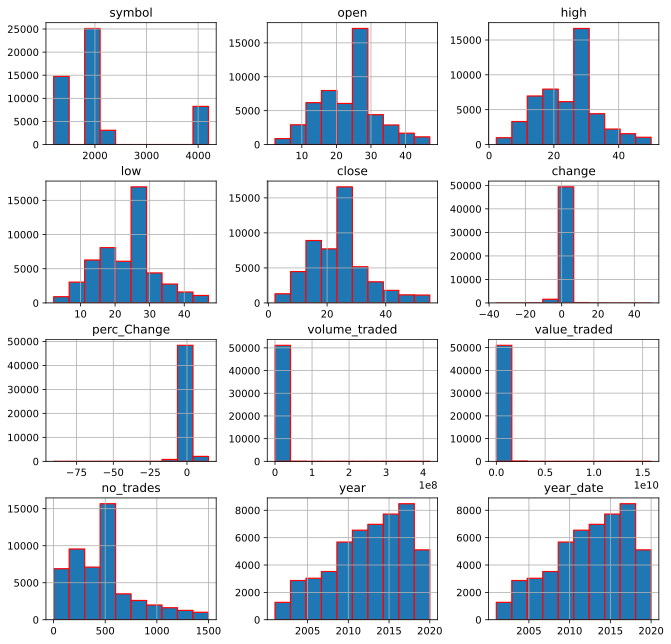

In [34]:
stock_train.hist(edgecolor='red', linewidth=1.2, figsize=(11, 11));

.

# **Step 5: Data Visualization**

### using Graphical representation to visualize the unique values present in the data. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


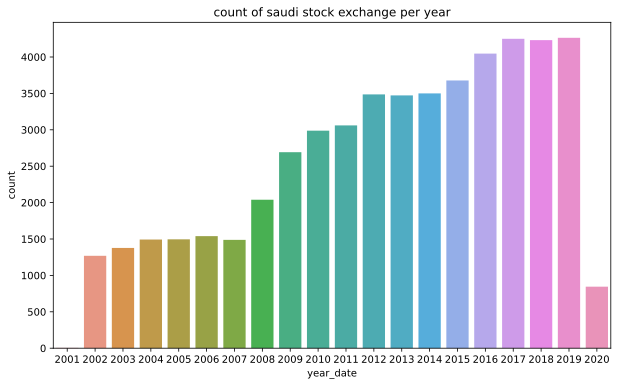

In [35]:
plt.figure(figsize=(10, 6))
plt.title('count of saudi stock exchange per year')
sns.countplot(stock_train['year_date']);

## **1.	Which sector is the most profitable?**

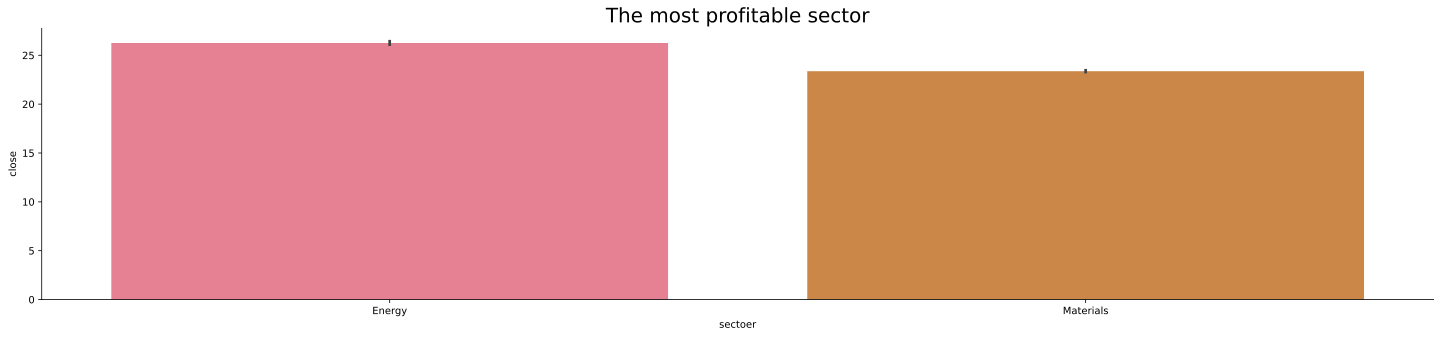

In [36]:
plt.subplots(figsize=(25,5))
plt.title('The most profitable sector', fontsize = 20)
sns.barplot(x = 'sectoer',y='close',data=stock_train,palette = sns.color_palette("husl", 11));
sns.despine();

.

## **2. What is the most valuable year in the Saudi stock market?**

In [37]:
a=stock_train.groupby(['year'])[['high']].sum().sort_values('high', ascending=False)
a

,high
year,
2014,109025.28
2015,105673.07
2018,95448.72
2019,94627.99
2017,90653.84
2016,89207.75
2012,87649.70
2013,87292.98
2011,73402.46


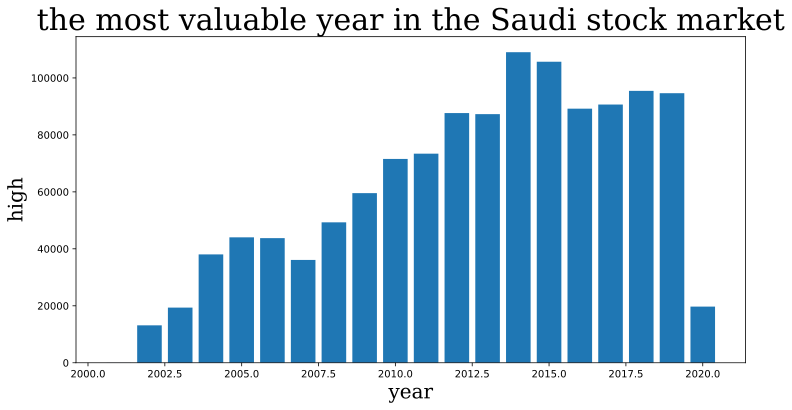

In [38]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.high);
plt.title('the most valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('high',fontsize=20,color='black',family='serif');

.

## **3. What is the lowiest valuable year in the Saudi stock market?**

In [39]:
b=stock_train.groupby(['year'])[['low']].sum().sort_values('low')
b

,low
year,
2001,42.15
2002,12951.80
2003,18826.75
2020,19116.52
2007,34694.92
2004,36554.95
2006,41968.56
2005,42147.10
2008,47238.89


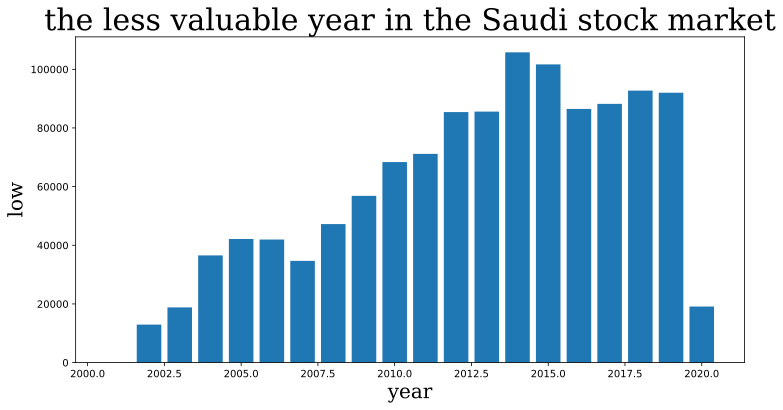

In [40]:
plt.figure(figsize=[12,6]);
plt.bar(b.index,b.low);
plt.title('the less valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('low',fontsize=20,color='black',family='serif');

.

## **4. What is the percentage change in the sector,and what is the highest sector?**

In [41]:
c=stock_train.groupby(['sectoer'])[['perc_Change']].max().sort_values('perc_Change', ascending=False)
c 

,perc_Change
sectoer,
Materials,14.58
Energy,11.59


([0, 1], <a list of 2 Text major ticklabel objects>)

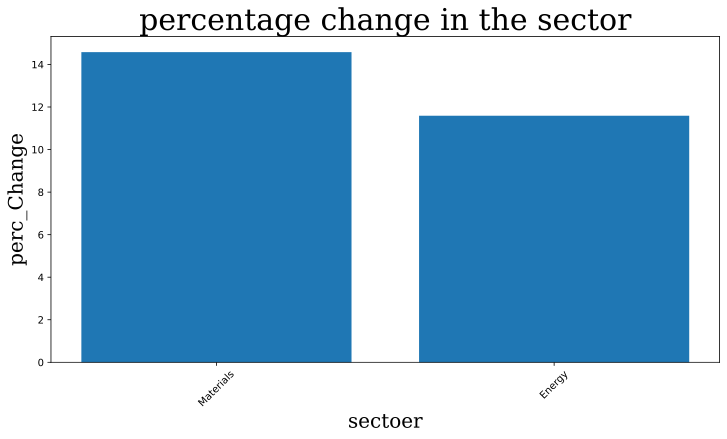

In [42]:
plt.figure(figsize=[12,6]);
plt.bar(c.index,c.perc_Change);
plt.title('percentage change in the sector',fontsize=30,color='black',family='serif');
plt.xlabel('sectoer',fontsize=20,color='black',family='serif');
plt.ylabel('perc_Change',fontsize=20,color='black',family='serif');
plt.xticks(rotation=45)

.

.

# **Step 6: Correlation Plot**

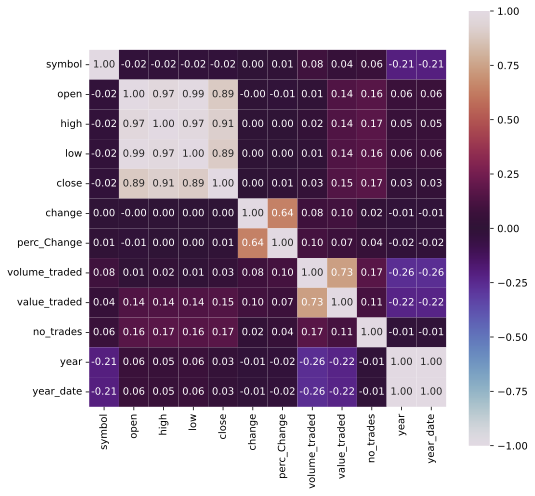

In [43]:
# Represent the correlation between the features. 
plt.figure(figsize=(8,8))
sns.heatmap(stock_train.corr(), vmax = 1, vmin = -1, cmap = 'twilight', cbar=True, annot=True, square=True, fmt='.2f', annot_kws = {'size': 10});

.

.

# **Step 7: Linear Regression**

**7.1 Fit a linear regression model on the train data set**

Because our training dataset is completely separated from the test dataest , we will define them separately.

In [44]:
#Separate our features from our target in train dataset

x_train = stock_train.loc[:,['open', 'high', 'low', 'change',]]
y_train = stock_train['close']

In [45]:
x_train.head()

,open,high,low,change
0,35.55,35.85,34.90,-0.40
1,34.70,35.65,34.50,0.25
2,34.70,35.15,34.70,1.05
3,35.20,35.65,34.00,-0.55
4,35.35,35.60,34.25,-2.05


In [46]:
y_train.head()

0    34.90
1    35.30
2    35.05
3    34.00
4    34.55
Name: close, dtype: float64

In [47]:
#Separate our features from our target in test dataset 
x_test = stock_test.loc[:,['open', 'high', 'low', 'change',]]
y_test = stock_test['close']

In [48]:
x_test.head()

,open,high,low,change
0,31.8,31.8,31.45,0.25
1,30.5,31.4,30.30,-0.35
2,31.7,32.3,31.30,-0.75
3,32.7,32.9,32.10,-0.25
4,32.5,32.8,32.45,0.50


In [49]:
y_test.head()

0    31.60
1    31.35
2    31.70
3    32.45
4    32.70
Name: close, dtype: float64

.

In [50]:
#Create a validation set
stock_train, stock_val = train_test_split(stock_train, test_size=0.25, random_state=10)
stock_val

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year,year_date
7390,2380,Rabigh Refining and Petrochemical Co.,PETRO RABIGH,Energy,26.00,26.40,25.70,53.25,-1.50,-2.73,4927854.0,2.655545e+08,506.0,2008,2008
9475,4030,National Shipping Company of Saudi Arabia,BAHRI,Energy,15.45,15.50,15.20,15.30,0.00,0.00,822224.0,1.262406e+07,287.0,2012,2012
27516,1304,Al Yamamah Steel Industries Co.,ALYAMAMAH STEEL,Materials,24.70,24.70,24.50,24.53,-0.29,-1.17,37313.0,9.191632e+05,76.0,2018,2018
13543,4200,Aldrees Petroleum and Transport Services Co.,ALDREES,Energy,40.83,40.83,38.83,40.33,-0.10,-0.25,1059792.0,4.242945e+07,479.0,2015,2015
51017,2090,National Gypsum Co.,NGC,Materials,12.12,12.18,12.06,12.06,-0.13,-1.07,66202.0,8.027343e+05,74.0,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36460,2010,Saudi Basic Industries Corp.,SABIC,Materials,26.00,26.40,25.70,26.00,0.00,0.00,4301579.0,5.570584e+08,506.0,2018,2018
15563,4200,Aldrees Petroleum and Transport Services Co.,ALDREES,Energy,23.75,23.92,23.50,23.53,0.00,0.00,8849333.0,2.096411e+08,506.0,2007,2007
29072,1320,Saudi Steel Pipe Co.,SSP,Materials,27.20,27.30,26.70,27.20,-0.09,-0.33,39948.0,1.079845e+06,76.0,2015,2015
31382,2001,Methanol Chemicals Co.,CHEMANOL,Materials,6.55,6.55,6.35,6.50,0.00,0.00,4112453.0,2.649779e+07,733.0,2016,2016


In [51]:
x_train, x_stock_val , y_train, y_stock_val = train_test_split(x_train, y_train, test_size=.25, random_state=3)

.

**7.2 Normalizing the Data**

In [52]:
feature_scale=['open','high', 'low', 'change']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train[feature_scale])

MinMaxScaler()

In [53]:
scaler.transform(x_train[feature_scale])

array([[0.41452514, 0.39225131, 0.41452514, 0.34927152],
       [0.53072626, 0.50575916, 0.52402235, 0.36331126],
       [0.30614525, 0.29633508, 0.30502793, 0.35258278],
       ...,
       [0.63128492, 0.59685864, 0.58100559, 0.30794702],
       [0.53072626, 0.50575916, 0.52402235, 0.35099338],
       [0.51731844, 0.49528796, 0.51731844, 0.34900662]])

In [54]:
scaler.transform(x_stock_val[feature_scale])

array([[0.79441341, 0.75078534, 0.7877095 , 0.35033113],
       [0.53072626, 0.50575916, 0.52402235, 0.34768212],
       [0.46480447, 0.45445026, 0.46145251, 0.3589404 ],
       ...,
       [0.82569832, 0.78115183, 0.82122905, 0.34437086],
       [0.59888268, 0.56125654, 0.59441341, 0.34609272],
       [0.59776536, 0.56020942, 0.57541899, 0.3402649 ]])

In [55]:
scaler.transform(x_test[feature_scale])

array([[0.6603352 , 0.61884817, 0.65251397, 0.35099338],
       [0.63128492, 0.6104712 , 0.62681564, 0.34304636],
       [0.65810056, 0.62931937, 0.64916201, 0.33774834],
       ...,
       [0.46324022, 0.46052356, 0.45653631, 0.36384106],
       [0.45877095, 0.43832461, 0.45877095, 0.31430464],
       [0.5150838 , 0.49005236, 0.5150838 , 0.31059603]])

.

In [56]:
# defined simple linear regression on training set
re = LinearRegression()
re.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

LinearRegression()

In [57]:
# Scor on stock_train set
re.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8332839831073751

In [58]:
# Scor on stock_validation set
re.score(stock_val[['open', 'high', 'low', 'change']], stock_val['close'])

0.8397766180870664

In [59]:
# Scor on stock_test set   
re.score(stock_test[['open','high', 'low', 'change']], stock_test['close']) 
##  Overfitting problem  

0.9972360430872825

Overfitting for test data 
so we are going to use decision trees.




**7.3 Random Forest Model Evaluation**

In [60]:
 # Import Decision Tree Classifier
dt = DecisionTreeRegressor()
dt.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

DecisionTreeRegressor()

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

RandomForestRegressor()

In [62]:
rf.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8673530794124849

In [63]:
dt.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8686057640017126

In [64]:
dt.score(stock_test[['open','high', 'low', 'change']], stock_test['close'])

0.6802028603546101

Train and test are close, so no overfitting and no outliers

**7.4 R-squared**

In [79]:
# Compare the actual y values in the training set with the predicted values
actual_train = stock_train['close']
predicted_train = re.predict(x_train[['open','high', 'low', 'change']])
predicted_train.shape

array([21.34326623, 26.7594002 , 16.66332803, ..., 30.66773037,
       26.74079203, 26.2851574 ])

In [72]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(actual_train, predicted_train))

13.26103548802269

In [73]:
stocsk_train_column = {'prediction': list(predicted_train)}
predicted_train = pd.DataFrame(data = stocsk_train_column)
predicted_train.head(10)

,prediction
0,21.343266
1,26.759400
2,16.663328
3,10.280961
4,28.064787
5,13.434055
6,9.482709
7,49.849529
8,16.956352
9,15.741141


.

In [76]:
# Compare the actual y values in the test set with the predicted values
actual_test = stock_test['close']
predicted_test = re.predict(stock_test[['open','high', 'low', 'change']])
predicted_test.shape

(6830,)

In [77]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(actual_test, predicted_test))

1.1952466252857985

In [78]:
stock_test_columns = {'prediction': list(predicted_test)}
predicted_test = pd.DataFrame(data = stock_test_columns)
predicted_test.head(10)

,prediction
0,32.250811
1,31.751176
2,32.648930
3,33.273690
4,33.296794
5,33.360556
6,34.139349
7,34.762317
8,35.382726
9,34.992741
